/Users/huziy/virtualenvs/py3.5/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/huziy/virtualenvs/py3.5/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


['__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_ax_plt_from_kw', '_boundarypolyll', '_boundarypolyxy', '_check_ax', '_cliplimb', '_fulldisk', '_getmapboundary', '_initialized_axes', '_mapboundarydrawn', '_readboundarydata', 'anchor', 'arcgisimage', 'area_thresh', 'aspect', 'ax', 'barbs', 'bluemarble', 'boundarylats', 'boundarylonmax', 'boundarylonmin', 'boundarylons', 'boundinglat', 'celestial', 'coastpolygons', 'coastpolygontypes', 'coastsegs', 'colorbar', 'contour', 'contourf', 'drawcoastlines', 'drawcounties', 'drawcountries', 'drawgreatcircle', 'drawlsmask', 'drawmapboundary', 'drawmapscale', 'drawmeridians', 'drawparallels', 'drawrivers', 'drawstates', 'ellipsoid', 'esq', 'etopo', 'fillcontinents

/Users/huziy/virtualenvs/py3.5/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3427: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/huziy/virtualenvs/py3.5/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3436: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


--


{-30: ([<matplotlib.lines.Line2D at 0x1072635f8>], []),
 -20: ([<matplotlib.lines.Line2D at 0x107263dd8>], []),
 -10: ([<matplotlib.lines.Line2D at 0x1072695f8>], []),
 0: ([<matplotlib.lines.Line2D at 0x107269dd8>], []),
 10: ([<matplotlib.lines.Line2D at 0x10726c5f8>], []),
 20: ([<matplotlib.lines.Line2D at 0x10726cdd8>], []),
 30: ([<matplotlib.lines.Line2D at 0x1072725f8>], [])}

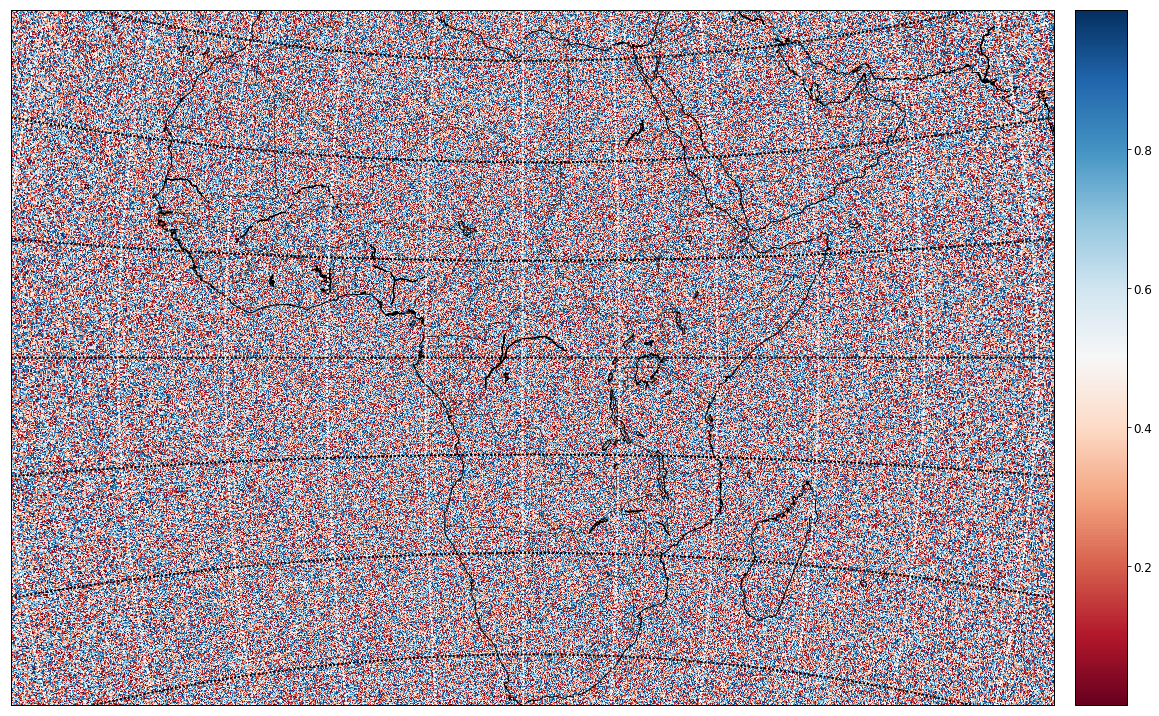

In [1]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 20))
lons = np.arange(-179.95, 180.01, 0.1)
lats = np.arange(-89.95, 90.01, 0.1)


llcrnrlon, llcrnrlat = -50, -40
urcrnrlon, urcrnrlat = 60, 40


m = Basemap(width=12000000, height=8000000,
                resolution='l', projection='stere',
                lat_ts=0, lat_0=0, lon_0=21
                #, llcrnrlon=llcrnrlon, llcrnrlat=llcrnrlat, urcrnrlon=urcrnrlon, urcrnrlat=urcrnrlat
)
    # m = Basemap(width=9000000, height=9000000,
    #             projection='aeqd', lat_0=0, lon_0=1)
data = np.random.random((1800, 3600))
lons, lats = np.meshgrid(lons, lats)
x, y = m(lons, lats)

print(dir(m))

data = np.ma.masked_where((x < m.xmin) | (x > m.xmax) | (y < m.ymin) | (y > m.ymax), data)


print(x.min(), x.max())
print(y.min(), y.max())

print(x.shape, y.shape, data.shape)
im = m.pcolormesh(x, y, data,
             latlon=False, cmap='RdBu')
# m.imshow(np.flipud(anom)[1500:2470,600:1200])
m.colorbar(im)
print(data[-1, -1])
m.drawcoastlines()
m.drawcountries()
m.drawmeridians(np.arange(-180, 190, 10), [1, 1, 1, 1], linewidth=2)
m.drawparallels(np.arange(-90, 100, 10), linewidth=2)
# plt.show()